## 1- Rachel Waltzer's Final Project- SI 330
Instructions: To properly run my project, please make sure that your version of bokeh is upgraded to version 1.4.0. If not, please type "pip install bokeh --upgrade" into your terminal. I will be using bokeh, geopandas, and descartes for my data visualizations. Please type into your terminal "pip install geopandas" and "pip install descartes". The files you will need are locations.csv, State_names.csv, tl_2019_us_uac10.shp, (in order to ruun that last file you need these too: tl_2019_us_uac10.cpg, tl_2019_us_uac10.dbf, tl_2019_us_uac10.prj, tl_2019_us_uac10.shp.ea.iso.xml, tl_2019_us_uac10.shp.iso.xml, and tl_2019_us_uac10.shx). I have provided these files in my submission.

Objectives: I have collected, manipulated and analyzed data regarding NFL teams and game results in 2019. 
I had three goals to accomplish:
1. To create profiles of each player based on their performances. I scraped data from the Pro Reference Football website to find the distances of pass yards, rush yards, and receiving yards for each player during each game of the season. I made a data visualization of my findings with a bar graph.
2. To find the performances of each team over the 2019 season. I used a csv file to merge additional information regarding the locations of each team with my original dateframe. The original website also had the winning and losing teams that corresponded to each game, so I scraped that information as well. 
3. To discover the geography of states of the winning teams. However, the new data set I found only contained the geopgraphy of some cities. Nonetheless, I created a map visualization of the  teams' locations across the country. 

All in all, I have showcased results based on the top teams, players, and specific positions of the 2019 NFL Football Season.

# 1- Data Gathering
I leveraged BeautifulSoup to scrape data from the Pro Reference Football website, which contains data from NFL teams. I focused on data from all of the weeks of the 2019 football season. I wanted to look at game-related information including rush yards, pass yards, and receiving yards. In addition I scraped information about the winners, losers, and their scores.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

try:
    matches_pd=pd.read_csv('./matches.csv')
    matches_pd=matches_pd.set_index('date')
except: 
    matches={'week':[],'date':[],'winner':[], 'winner_score':[],'loser':[],
             'loser_score':[],'PassYds':[],'RushYds':[],'RecYds':[],
             'passPlayer':[],'rushPlayer':[],'recPlayer':[]}
    for i in range(1,18):
        url=f"https://www.pro-football-reference.com/years/2019/week_{i}.htm"
        page = requests.get(url)

        if page.status_code==200:

            soup = BeautifulSoup(page.content, 'html.parser')
            game_summaries = soup.find("div", {"class": "game_summaries"})
            for summary in game_summaries.find_all("div", {"class": "game_summary expanded nohover"}):

                match=summary.find("table", {"class": "teams"})
                stats=summary.find("table", {"class": "stats"})
                match_date=match.find("tr",{"class":"date"}).text
                try:
                    winner_div=[child.text for i,child in enumerate(match.find("tr",{"class":"winner"}).find_all('td')) if i<2]
                    loser_div=[child.text for i,child in enumerate(match.find("tr",{"class":"loser"}).find_all('td')) if i<2]
                except:
                    continue
                matches['date'].append(match_date)
                winner, winner_score= winner_div
                loser, loser_score= loser_div

                matches['winner'].append(winner)
                matches['winner_score'].append(winner_score)
                matches['loser'].append(loser)
                matches['loser_score'].append(loser_score)

                players_list=[]
                yds_list=[]
                for tbody in stats.find('tbody'):
                    try:
                        _,player,yds=tuple([each_tr.text for each_tr in tbody.find_all('td')])
                        players_list.append(player)
                        yds_list.append(yds)
                    except:
                        continue
                matches['PassYds'].append(yds_list[0])
                matches['RushYds'].append(yds_list[1])
                matches['RecYds'].append(yds_list[2])
                matches['passPlayer'].append(players_list[0])
                matches['rushPlayer'].append(players_list[1])
                matches['recPlayer'].append(players_list[2])                    
                matches['week'].append(i)
    matches_pd=pd.DataFrame(matches)
    matches_pd=matches_pd.set_index('date')
    matches_pd.to_csv('./matches.csv')

In [2]:
matches_pd

,week,winner,winner_score,loser,loser_score,PassYds,RushYds,RecYds,passPlayer,rushPlayer,recPlayer
date,,,,,,,,,,,
"Sep 5, 2019",1,Green Bay Packers,10,Chicago Bears,3,228,39,102,Trubisky-CHI,Jones-GNB,Robinson-CHI
"Sep 8, 2019",1,Tennessee Titans,43,Cleveland Browns,13,285,84,100,Mayfield-CLE,Henry-TEN,Brown-TEN
"Sep 8, 2019",1,Los Angeles Rams,30,Carolina Panthers,27,239,128,81,Newton-CAR,McCaffrey-CAR,McCaffrey-CAR
"Sep 8, 2019",1,Philadelphia Eagles,32,Washington Redskins,27,380,47,154,Keenum-WAS,Sproles-PHI,Jackson-PHI
"Sep 8, 2019",1,Buffalo Bills,17,New York Jets,16,254,70,123,Allen-BUF,Singletary-BUF,Brown-BUF
...,...,...,...,...,...,...,...,...,...,...,...
"Dec 1, 2019",13,Los Angeles Rams,34,Arizona Cardinals,7,424,95,172,Goff-LAR,Gurley-LAR,Woods-LAR
"Dec 1, 2019",13,Kansas City Chiefs,40,Oakland Raiders,9,222,104,100,Carr-OAK,Jacobs-OAK,Waller-OAK
"Dec 1, 2019",13,Denver Broncos,23,Los Angeles Chargers,20,265,99,117,Rivers-LAC,Gordon-LAC,Williams-LAC


## 2- Data Cleaning:
To start cleaning the data I scraped, I converted the date column values to the correct timestamp format.

In [3]:
matches_pd.index=pd.to_datetime(matches_pd.index)
matches_pd.dropna()
matches_pd.dtypes

week             int64
winner          object
winner_score     int64
loser           object
loser_score      int64
PassYds          int64
RushYds          int64
RecYds           int64
passPlayer      object
rushPlayer      object
recPlayer       object
dtype: object

## Regex
I used regex to create columns for the home city of the team in which the best players, in terms of pass yards, rush yards, and receiving yards, belong to. 

In [4]:
import numpy as np

matches_pd['Pass Player City'] = matches_pd['passPlayer'].str.extract('(?P<Pass_Player_City>-[A-Z]+)')
matches_pd['Pass Player City'] = matches_pd['Pass Player City'].str.replace(r'-','')
matches_pd['passPlayer'] = matches_pd['passPlayer'].str.replace(r'-[A-Z]+','')


matches_pd['Rush Player City'] = matches_pd['rushPlayer'].str.extract('(?P<Rush_Player_City>-[A-Z]+)')
matches_pd['Rush Player City'] = matches_pd['Rush Player City'].str.replace(r'-','')
matches_pd['rushPlayer'] = matches_pd['rushPlayer'].str.replace(r'-[A-Z]+','')

matches_pd['Rec Player City'] = matches_pd['recPlayer'].str.extract('(?P<Rec_Player_City>-[A-Z]+)')
matches_pd['Rec Player City'] = matches_pd['Rec Player City'].str.replace(r'-','')
matches_pd['recPlayer'] = matches_pd['recPlayer'].str.replace(r'-[A-Z]+','')


In [5]:
matches_pd

,week,winner,winner_score,loser,loser_score,PassYds,RushYds,RecYds,passPlayer,rushPlayer,recPlayer,Pass Player City,Rush Player City,Rec Player City
date,,,,,,,,,,,,,,
2019-09-05,1,Green Bay Packers,10,Chicago Bears,3,228,39,102,Trubisky,Jones,Robinson,CHI,GNB,CHI
2019-09-08,1,Tennessee Titans,43,Cleveland Browns,13,285,84,100,Mayfield,Henry,Brown,CLE,TEN,TEN
2019-09-08,1,Los Angeles Rams,30,Carolina Panthers,27,239,128,81,Newton,McCaffrey,McCaffrey,CAR,CAR,CAR
2019-09-08,1,Philadelphia Eagles,32,Washington Redskins,27,380,47,154,Keenum,Sproles,Jackson,WAS,PHI,PHI
2019-09-08,1,Buffalo Bills,17,New York Jets,16,254,70,123,Allen,Singletary,Brown,BUF,BUF,BUF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,13,Los Angeles Rams,34,Arizona Cardinals,7,424,95,172,Goff,Gurley,Woods,LAR,LAR,LAR
2019-12-01,13,Kansas City Chiefs,40,Oakland Raiders,9,222,104,100,Carr,Jacobs,Waller,OAK,OAK,OAK
2019-12-01,13,Denver Broncos,23,Los Angeles Chargers,20,265,99,117,Rivers,Gordon,Williams,LAC,LAC,LAC


## 3- Data Manipulation:
I implemented sqlite3 to create a database of the cities, states, and nicknames of which each team belongs to. The files that are created are locations.db and locations.db-journal. I first created a file called locations.csv that contains information about the home towns of each team. I used this information to create a table in my database. 

In [6]:
import sqlite3
conn = sqlite3.connect("locations.db")
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS mytable;")
cur.execute("""CREATE TABLE mytable(
   CITY     VARCHAR(13) NOT NULL 
  ,STATE    VARCHAR(14) NOT NULL
  ,NICKNAME VARCHAR(10) NOT NULL PRIMARY KEY
);""")

with open('locations.csv','r') as f:
    for line in f.readlines():
        cur.execute(f"INSERT INTO mytable(CITY,STATE,NICKNAME) VALUES('{line.split(',')[0].strip()}','{line.split(',')[1].strip()}','{line.split(',')[2].strip()}');")

cur.execute("select * from mytable;")
sql_df = pd.read_sql_query("select * from mytable;", conn)
sql_df.head()


,CITY,STATE,NICKNAME
0,Atlanta,Georgia,Falcons
1,Baltimore,Maryland,Ravens
2,Boston,Massachusetts,Patriots
3,Buffalo,New York,Bills
4,Charlotte,North Carolina,Panthers


In [7]:
sql_df['teamName']= sql_df.apply(lambda row: row['CITY']+' '+row['NICKNAME'],axis=1)
sql_df.head()

,CITY,STATE,NICKNAME,teamName
0,Atlanta,Georgia,Falcons,Atlanta Falcons
1,Baltimore,Maryland,Ravens,Baltimore Ravens
2,Boston,Massachusetts,Patriots,Boston Patriots
3,Buffalo,New York,Bills,Buffalo Bills
4,Charlotte,North Carolina,Panthers,Charlotte Panthers


## Merging SQL and Pandas
My goal was to add each team's city, state, and nickname into my original dataframe. So, I merged the SQL dataframe with my original pandas dataframe.

In [8]:
winner_joined_pd=matches_pd.reset_index().merge(sql_df, left_on='winner', right_on= 'teamName')
winner_joined_pd=winner_joined_pd.rename({'STATE':'WinnerState',
                                            'CITY':'WinnerCity',
                                            'NICKNAME':'WinnerNickName'}, axis='columns')
winner_joined_pd.drop('teamName',axis=1,inplace=True)

loser_joined_pd=winner_joined_pd.merge(sql_df, left_on='loser', right_on= 'teamName')
loser_joined_pd=loser_joined_pd.rename({'STATE':'LoserState',
                                            'CITY':'LoserCity',
                                            'NICKNAME':'LoserNickName'}, axis='columns')
loser_joined_pd.drop('teamName',axis=1,inplace=True)
merged_df=loser_joined_pd.set_index('date')
merged_df.head()

,week,winner,winner_score,loser,loser_score,PassYds,RushYds,RecYds,passPlayer,rushPlayer,recPlayer,Pass Player City,Rush Player City,Rec Player City,WinnerCity,WinnerState,WinnerNickName,LoserCity,LoserState,LoserNickName
date,,,,,,,,,,,,,,,,,,,,
2019-09-05,1,Green Bay Packers,10,Chicago Bears,3,228,39,102,Trubisky,Jones,Robinson,CHI,GNB,CHI,Green Bay,Wisconsin,Packers,Chicago,Illinois,Bears
2019-11-03,9,Philadelphia Eagles,22,Chicago Bears,14,239,82,103,Wentz,Howard,Ertz,PHI,PHI,PHI,Philadelphia,Pennsylvania,Eagles,Chicago,Illinois,Bears
2019-10-20,7,New Orleans Saints,36,Chicago Bears,25,281,119,131,Bridgewater,Murray,Thomas,NOR,NOR,NOR,New Orleans,Louisiana,Saints,Chicago,Illinois,Bears
2019-10-06,5,Oakland Raiders,24,Chicago Bears,21,231,123,97,Daniel,Jacobs,Robinson,CHI,OAK,CHI,Oakland,California,Raiders,Chicago,Illinois,Bears
2019-09-22,3,Green Bay Packers,27,Denver Broncos,16,235,81,99,Rodgers,Lindsay,Valdescantling,GNB,DEN,S,Green Bay,Wisconsin,Packers,Denver,Colorado,Broncos


## 4- Data Reporting: 
Idea1: Monitor the performance of teams over weeks
Idea2: investigate correlation between stats and scores in matches
Idea 3: Profiling of the players
Idea 4: studying correlation between

I created profiles for each player that identified them as either a passer, rusher, or receiver. I also wanted to draw conclusions on the results of their passes/rushes/receivals throughout the timeframe of the dataframe. 

## Data Visualization- Player Performance
This bar graph shows the players who received the highest counts for each category througout the season. I have broken up my findings for pass counts, rush counts, and receive counts by color. This could be useful to quickly look at which players performed best in their specific category. It also highlights the select few players who served as two roles on the team. 

In [9]:
import matplotlib.pyplot as plt

merged_df=merged_df.astype({'PassYds':'int32','RushYds':'int32','RecYds':'int32'})

pass_df=merged_df.groupby(['passPlayer','Pass Player City']).PassYds.agg(['count','mean']).sort_values('count').reset_index()
pass_df.rename({'passPlayer':'player','Pass Player City':'team','count':'passCount','mean':'passMean'},inplace=True,axis=1)
rush_df=merged_df.groupby(['rushPlayer','Rush Player City']).PassYds.agg(['count','mean']).sort_values('count').reset_index()
rush_df.rename({'rushPlayer':'player','Rush Player City':'team','count':'rushCount','mean':'rushMean'},inplace=True,axis=1)
rec_df=merged_df.groupby(['recPlayer','Rec Player City']).PassYds.agg(['count','mean']).sort_values('count').reset_index()
rec_df.rename({'recPlayer':'player','Rec Player City':'team','count':'recCount','mean':'recMean'},inplace=True,axis=1)
players_df=pass_df.merge(rush_df,how='outer')
players_df=players_df.merge(rec_df, how='outer')
players_df.set_index(['player','team'],inplace=True)
players_df.plot(y=['passCount','rushCount','recCount'],kind='bar',figsize=(24,10))
plt.show()

<Figure size 2400x1000 with 1 Axes>

In [10]:
merged_df.head()

,week,winner,winner_score,loser,loser_score,PassYds,RushYds,RecYds,passPlayer,rushPlayer,recPlayer,Pass Player City,Rush Player City,Rec Player City,WinnerCity,WinnerState,WinnerNickName,LoserCity,LoserState,LoserNickName
date,,,,,,,,,,,,,,,,,,,,
2019-09-05,1,Green Bay Packers,10,Chicago Bears,3,228,39,102,Trubisky,Jones,Robinson,CHI,GNB,CHI,Green Bay,Wisconsin,Packers,Chicago,Illinois,Bears
2019-11-03,9,Philadelphia Eagles,22,Chicago Bears,14,239,82,103,Wentz,Howard,Ertz,PHI,PHI,PHI,Philadelphia,Pennsylvania,Eagles,Chicago,Illinois,Bears
2019-10-20,7,New Orleans Saints,36,Chicago Bears,25,281,119,131,Bridgewater,Murray,Thomas,NOR,NOR,NOR,New Orleans,Louisiana,Saints,Chicago,Illinois,Bears
2019-10-06,5,Oakland Raiders,24,Chicago Bears,21,231,123,97,Daniel,Jacobs,Robinson,CHI,OAK,CHI,Oakland,California,Raiders,Chicago,Illinois,Bears
2019-09-22,3,Green Bay Packers,27,Denver Broncos,16,235,81,99,Rodgers,Lindsay,Valdescantling,GNB,DEN,S,Green Bay,Wisconsin,Packers,Denver,Colorado,Broncos


## Results from Bar Graph
I wanted to present the results in a way other than the bar graph, since it can be difficult to read and you have to zoom in. I broke my results down by category, passers, rushers, and receivers. 

## Team with the top pass yards and passers
Below shows the teams that have the highest average pass yards and the highest average number of top passers.

In [11]:
pass_teams_df1 = pass_df.groupby("team").agg(np.nanmean)
pass_teams_df1 = pass_teams_df1.sort_values(by="passMean", ascending=False)
pass_teams_df1.iloc[0]

passCount      1.5
passMean     388.0
Name: ATL, dtype: float64

In [12]:
pass_teams_df2 = pass_df.groupby("team").agg(np.nanmean)
pass_teams_df2 = pass_teams_df2.sort_values(by="passCount", ascending=False)
pass_teams_df2.iloc[0]

passCount      9.000000
passMean     322.333333
Name: DAL, dtype: float64

## Team with top rush yards and rushers
Below shows the team that has the highest average number of rush yards and the highest average number of top rushers.

In [13]:
rush_teams_df1 = rush_df.groupby("team").agg(np.nanmean)
rush_teams_df1 = rush_teams_df1.sort_values(by="rushMean", ascending=False)
rush_teams_df1.iloc[0]

rushCount      7.000000
rushMean     323.428571
Name: OAK, dtype: float64

In [14]:
rush_teams_df2 = rush_df.groupby("team").agg(np.nanmean)
rush_teams_df2 = rush_teams_df2.sort_values(by="rushCount", ascending=False)
rush_teams_df2.iloc[0]

rushCount      7.000000
rushMean     323.428571
Name: OAK, dtype: float64

## Team with top receiving yards and receivers  
Below shows the team that has the highest average number of receiving yards and the highest average number of top receivers.

In [15]:
#Team with highest average rec yards
rec_teams_df1 = rec_df.groupby("team").agg(np.nanmean)
rec_teams_df1 = rec_teams_df1.sort_values(by="recMean", ascending=False)
rec_teams_df1.iloc[0]

recCount      1.000000
recMean     351.833333
Name: KAN, dtype: float64

In [16]:
#Team with highest average number of recs
rec_teams_df2 = rec_df.groupby("team").agg(np.nanmean)
rec_teams_df2 = rec_teams_df2.sort_values(by="recCount", ascending=False)
rec_teams_df2.iloc[0]

recCount      5.0
recMean     280.2
Name: NOR, dtype: float64

In [17]:
#num of wins per team
#merged_df.groupby(['winner']).winner_score.count()
#merged_df.groupby("WinnerNickName").agg([np.nanmean,np.nanstd]).dropna(how="all")

## Date Visualization- Team Performance
I wanted to show the team with the most wins per week. By looking at the week number on the x-axis, you can see which team won the most games during that given week.

In [18]:
from bokeh.plotting import figure ,show
from bokeh.io import output_notebook, push_notebook
from bokeh.models import Legend
import random
output_notebook()

grouped_df=merged_df.groupby(['winner','week']).winner_score.count().reset_index()
grouped_df.sort_values('winner')
teams_week={'team':[],'week':[],'wins':[]}
for team in set(grouped_df.winner):
    winning_weeks=list(grouped_df.loc[grouped_df.winner==team].week)

    winning_count=0
    for i in range(1,14):
        if i in winning_weeks:
            winning_count+=1
        teams_week['team'].append(team)
        teams_week['week'].append(i)
        teams_week['wins'].append(winning_count)


team_performance_df=pd.DataFrame(teams_week)


p = figure(plot_width = 900, plot_height = 600, 
           title = 'Teams Performances',
           x_axis_label = 'Weeks',
           y_axis_label = 'Total Number of Wins')

legend_it=[]
for i,team in enumerate(set(grouped_df.winner)):    
    c=p.line(team_performance_df.loc[team_performance_df.team==team].week, 
             team_performance_df.loc[team_performance_df.team==team].wins, 
             line_color=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))
    legend_it.append((team, [c]))

legend = Legend(items= legend_it, location=(0, -60))  
legend.click_policy="mute"
p.add_layout(legend, 'right')

p.xaxis.major_label_overrides = {week:'week'+str(week) for week in set(team_performance_df.week)}
show(p)




Loading BokehJS ...

## Data Visualization- Geography of winning teams
I created a map of the winnning teams across the nation. To do this, I merged the team names from my original dataframe with their geographies from another dataframe.

In [19]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import descartes
%matplotlib inline

usa = gpd.read_file("tl_2019_us_uac10.shp")
usa

,UACE10,GEOID10,NAME10,NAMELSAD10,LSAD10,MTFCC10,UATYP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,24310,24310,"Dixon, IL","Dixon, IL Urban Cluster",76,G3500,C,S,25554126,938057,+41.8529507,-089.4817439,"POLYGON ((-89.49859 41.85467, -89.49858 41.855..."
1,27847,27847,"Escanaba, MI","Escanaba, MI Urban Cluster",76,G3500,C,S,46643395,283456,+45.7959215,-087.0945936,"MULTIPOLYGON (((-87.09519 45.79692, -87.09496 ..."
2,18100,18100,"Clintonville, WI","Clintonville, WI Urban Cluster",76,G3500,C,S,5854687,502563,+44.6232203,-088.7611283,"POLYGON ((-88.78650 44.62996, -88.78574 44.630..."
3,06166,06166,"Bedford, IN","Bedford, IN Urban Cluster",76,G3500,C,S,30413948,2314,+38.8566530,-086.5012383,"MULTIPOLYGON (((-86.52020 38.86783, -86.52016 ..."
4,75270,75270,"Riverdale, CA","Riverdale, CA Urban Cluster",76,G3500,C,S,2306821,0,+36.4310710,-119.8620544,"POLYGON ((-119.86913 36.43083, -119.87093 36.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,95482,95482,"Williamston, MI","Williamston, MI Urban Cluster",76,G3500,C,S,10894352,243568,+42.6866692,-084.2572215,"MULTIPOLYGON (((-84.30242 42.69377, -84.30236 ..."
3597,56980,56980,"Midland, MI","Midland, MI Urbanized Area",75,G3500,U,S,116216307,3698040,+43.6163010,-084.2198783,"MULTIPOLYGON (((-84.19986 43.65057, -84.19703 ..."
3598,10675,10675,"Brooklyn, MI","Brooklyn, MI Urban Cluster",76,G3500,C,S,7677057,129296,+42.1020619,-084.2748473,"POLYGON ((-84.25746 42.10875, -84.25746 42.110..."
3599,31450,31450,"Franklin--Highland Lake, NJ","Franklin--Highland Lake, NJ Urban Cluster",76,G3500,C,S,84305036,3338986,+41.1692099,-074.5460821,"MULTIPOLYGON (((-74.58574 41.19401, -74.58563 ..."


## More Cleaning
I cleaned this new set of data to just show the city, state, and geometry.

In [20]:
usa['city'] = usa.NAME10.apply(lambda x: x.split(',')[0].strip())
usa['state'] = usa.NAME10.apply(lambda x: x.split(',')[1].strip())
usa_map = usa[['city', 'state', 'geometry']]
usa_map

,city,state,geometry
0,Dixon,IL,"POLYGON ((-89.49859 41.85467, -89.49858 41.855..."
1,Escanaba,MI,"MULTIPOLYGON (((-87.09519 45.79692, -87.09496 ..."
2,Clintonville,WI,"POLYGON ((-88.78650 44.62996, -88.78574 44.630..."
3,Bedford,IN,"MULTIPOLYGON (((-86.52020 38.86783, -86.52016 ..."
4,Riverdale,CA,"POLYGON ((-119.86913 36.43083, -119.87093 36.4..."
...,...,...,...
3596,Williamston,MI,"MULTIPOLYGON (((-84.30242 42.69377, -84.30236 ..."
3597,Midland,MI,"MULTIPOLYGON (((-84.19986 43.65057, -84.19703 ..."
3598,Brooklyn,MI,"POLYGON ((-84.25746 42.10875, -84.25746 42.110..."
3599,Franklin--Highland Lake,NJ,"MULTIPOLYGON (((-74.58574 41.19401, -74.58563 ..."


## More Merging
I merged team names with their respective city and state. I then joined each team name with their geometry. I used geopandas to create a map of the US and show the location of each winning team. I created a legend key to see which team belongs to which mark on the map. This information can be useful to determine where the most successful teams are located on the map of the US. We can conclude that the majority of winning teams are from the northeast and the southeast.

In [21]:
team_state_city = {'teamName':[], 'teamState':[], 'teamCity': []}
for team in set(list(merged_df.winner)+(list(merged_df.loser))):
    if team not in team_state_city['teamName']:
        team_state_city['teamName'].append(team)
        team_state_city['teamState'].append(merged_df.loc[merged_df.winner==team].WinnerState.values[0])
        team_state_city['teamCity'].append(merged_df.loc[merged_df.winner==team].WinnerCity.values[0])
team_state_city = pd.DataFrame(team_state_city)

state_names = pd.read_csv('State_names.csv')
team_location_df = team_state_city.merge(state_names, left_on='teamState', right_on='State')
team_location_df.rename({'Short':'state', 'teamCity': 'city'}, inplace=True, axis=1)
team_location_df.state = team_location_df.state.apply(lambda x: x.upper().strip())
team_location_df = team_location_df[['teamName', 'city', 'state']]
team_location_df

,teamName,city,state
0,New Orleans Saints,New Orleans,LA
1,Buffalo Bills,Buffalo,NY
2,New York Jets,New York,NY
3,New York Giants,New York,NY
4,Jacksonville Jaguars,Jacksonville,FL
5,Miami Dolphins,Miami,FL
6,Philadelphia Eagles,Philadelphia,PA
7,Pittsburgh Steelers,Pittsburgh,PA
8,San Francisco 49ers,San Francisco,CA
9,Oakland Raiders,Oakland,CA


In [22]:
team_geometry_df = team_location_df.merge(usa_map, how = 'inner', on=['city', 'state'])
team_geometry_df

,teamName,city,state,geometry
0,New Orleans Saints,New Orleans,LA,"MULTIPOLYGON (((-90.07488 29.86755, -90.07468 ..."
1,Buffalo Bills,Buffalo,NY,"MULTIPOLYGON (((-78.81800 42.71132, -78.81838 ..."
2,Jacksonville Jaguars,Jacksonville,FL,"MULTIPOLYGON (((-81.45892 30.39294, -81.45850 ..."
3,Miami Dolphins,Miami,FL,"MULTIPOLYGON (((-80.11126 26.98459, -80.10995 ..."
4,Pittsburgh Steelers,Pittsburgh,PA,"MULTIPOLYGON (((-79.84217 40.60759, -79.84224 ..."
5,Indianapolis Colts,Indianapolis,IN,"MULTIPOLYGON (((-86.12079 39.58832, -86.12095 ..."
6,Houston Texans,Houston,TX,"MULTIPOLYGON (((-95.20848 29.88301, -95.20780 ..."
7,Cleveland Browns,Cleveland,OH,"MULTIPOLYGON (((-81.50999 41.25827, -81.51230 ..."
8,Green Bay Packers,Green Bay,WI,"MULTIPOLYGON (((-88.03431 44.63608, -88.03430 ..."
9,Detroit Lions,Detroit,MI,"MULTIPOLYGON (((-82.88795 42.66952, -82.88766 ..."


(15.403765, 58.035194)

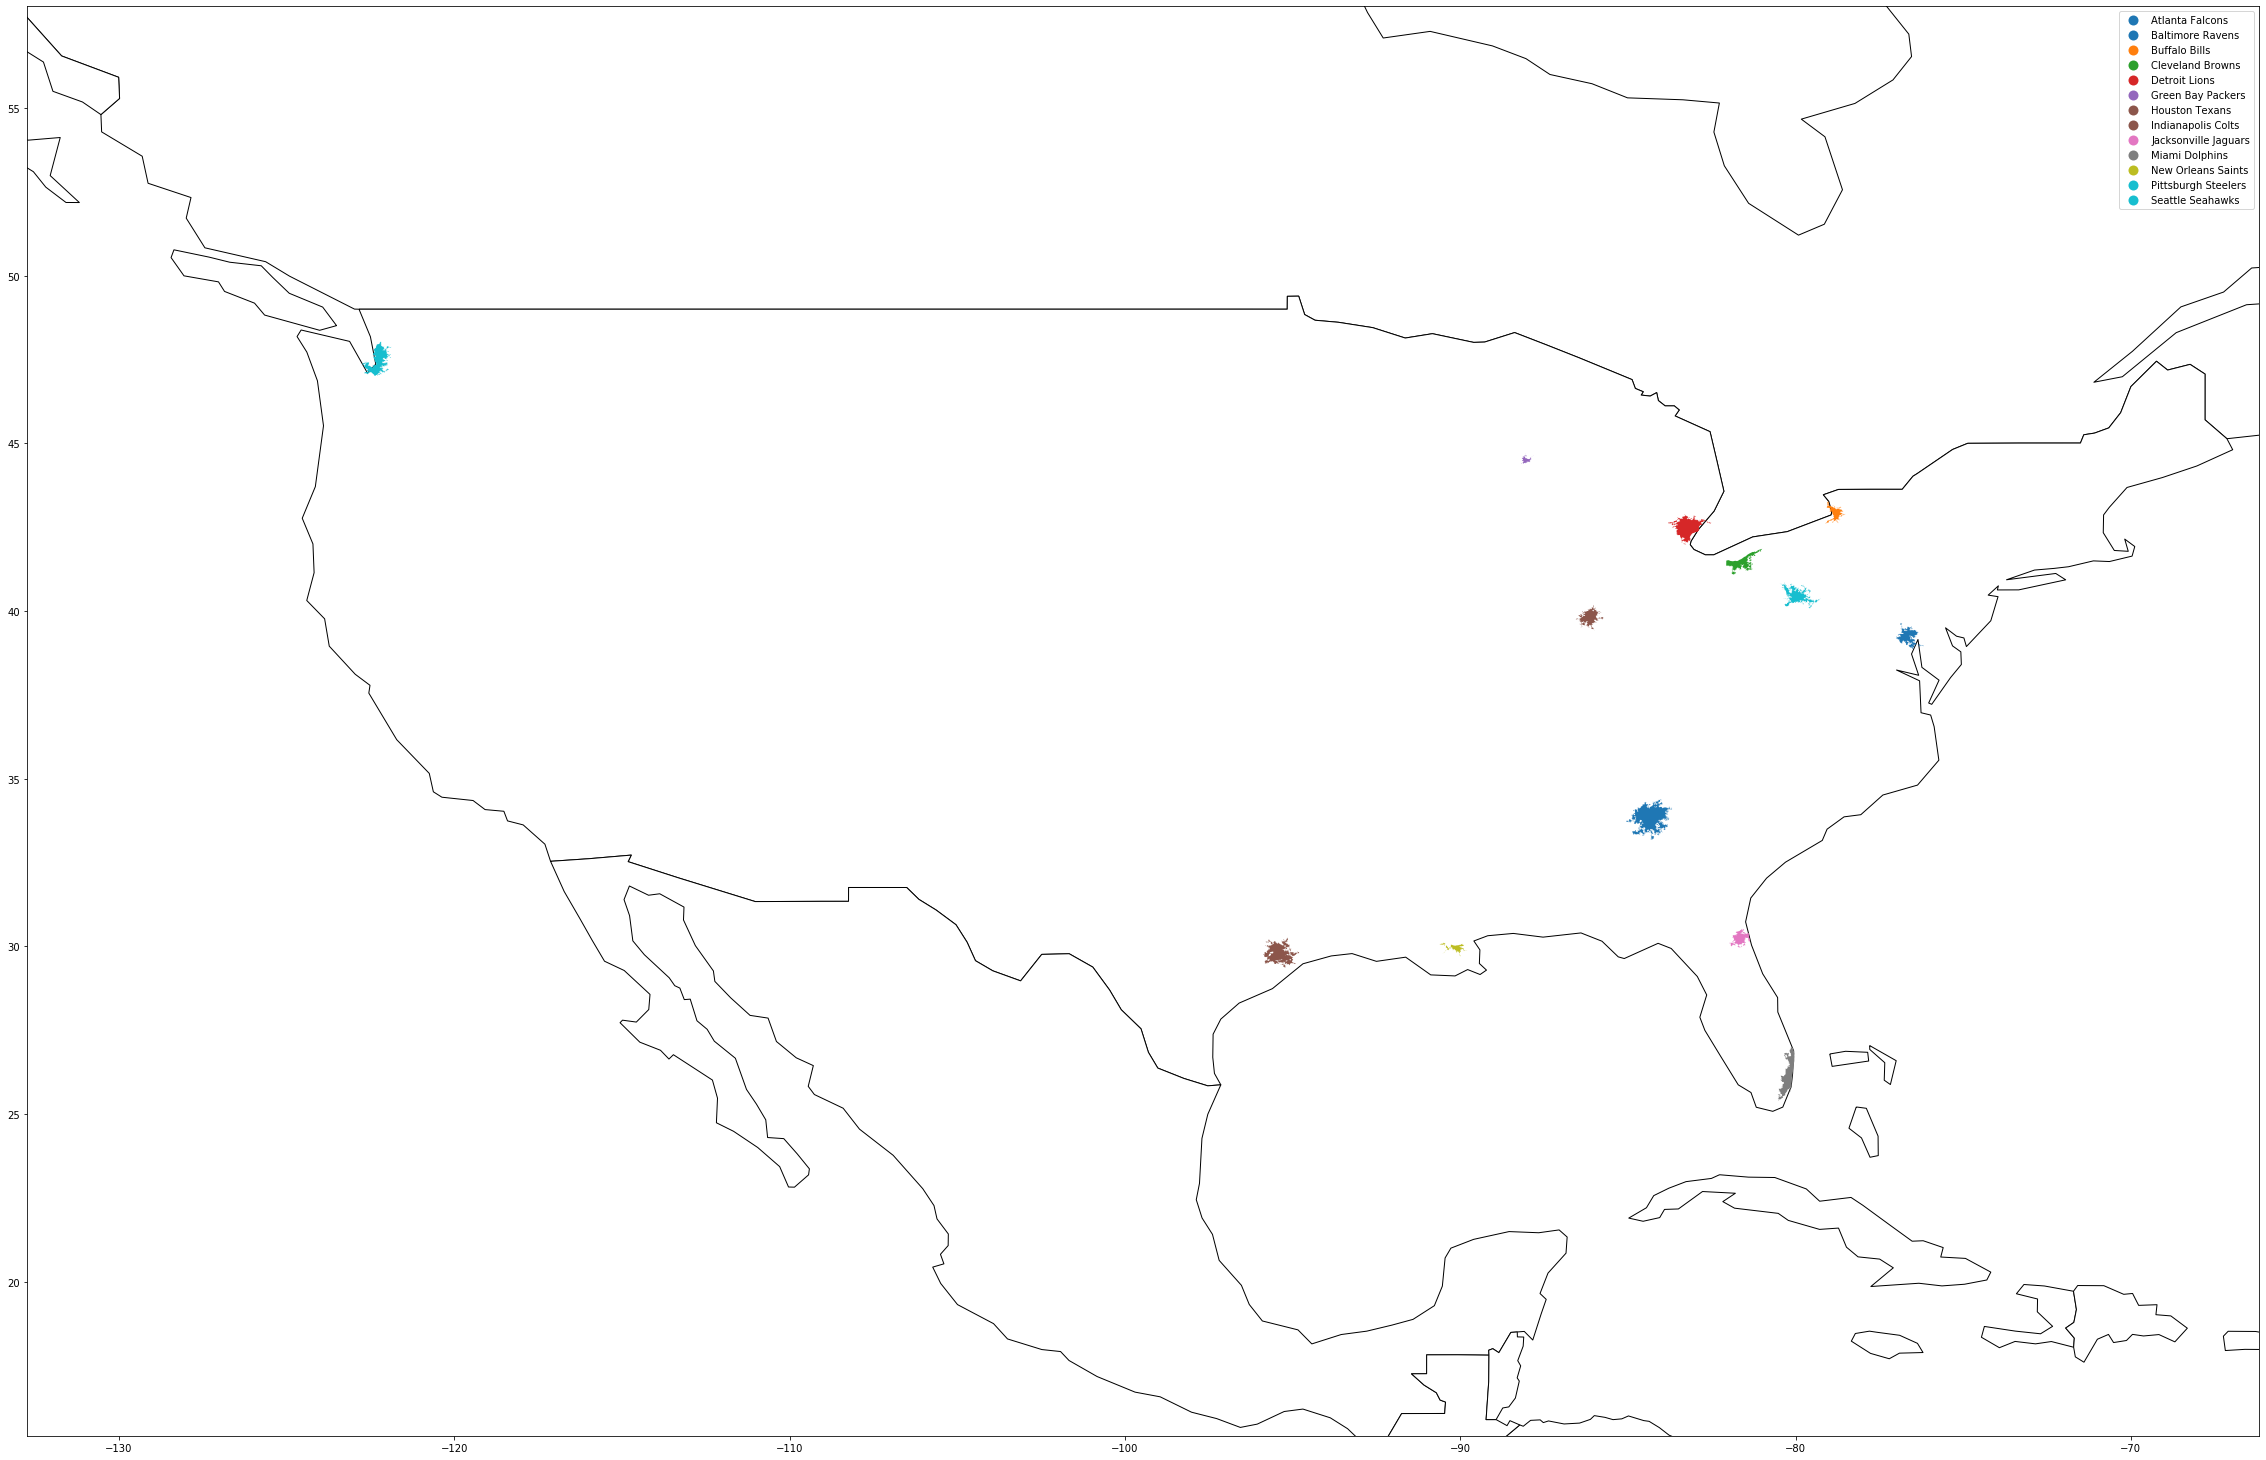

In [23]:
from geopandas import GeoDataFrame
import geopandas 

fig, ax = plt.subplots(1, 1, figsize = (40,40))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', ax=ax)
crs = {'init':'espsg:4326'}
team_gdf = GeoDataFrame(team_geometry_df, crs=crs, geometry = 'geometry')
team_gdf.plot(ax= base, figsize = (300, 120), column = 'teamName', legend = True)

minx, miny, maxx, maxy = team_gdf.total_bounds
ax.set_xlim(minx-10, maxx+10)
ax.set_ylim(miny-10, maxy+10)

## Conclusion 
I believe that the information found can be useful to my employer because it summarizes the successes of players and teams. In addition, the locations of the top teams are visually displayed on a map and can be used to make further conslusions. Also, since I categorized each top player by their position, coaches can use my research and findings to inform decisions about recruiting players and their appropriate salaries.  